In [1]:
from scrapper import Scrapper
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import seaborn as sns
from collections import OrderedDict
import random

/media/alex/7d249154-7ace-4659-a75b-f05f66d5e9fb/Bets/scrapper.py:99: SyntaxWarning: invalid escape sequence '\d'
  re_out = re.findall('\d{2}:\d{2}', self.string)


In [2]:
scrapper = Scrapper()
data = scrapper.scrapp_multi_files("Archive")

In [3]:
data

,tournament,team_1,team_1_goals,team_2,team_2_goals,time,coef_w_1,coef_w_2,coef_even
0,nb-iii-west-2021-2022.txt,BVSC-Zuglo,0,Zalaegerszegi II,1,18:00,1.14,13.78,8.13
1,nb-iii-west-2021-2022.txt,Erdi,1,Veszprem,1,18:00,5.19,1.52,4.27
2,nb-iii-west-2021-2022.txt,Kaposvar,1,Gardony Varosi,0,18:00,1.27,8.38,5.64
3,nb-iii-west-2021-2022.txt,Nagykanizsa,1,Puskas Academy II,2,18:00,3.10,2.01,3.62
4,nb-iii-west-2021-2022.txt,Tatabanya,4,Kelen,1,18:00,1.78,3.73,3.85
...,...,...,...,...,...,...,...,...,...
286101,c-league-2020.txt,Svay Rieng,5,Soltilo Angkor,1,13:00,1.18,9.23,6.97
286102,c-league-2020.txt,Angkor Tiger,1,Boeung Ket,1,10:30,2.21,2.70,3.58
286103,c-league-2020.txt,Asia Euro United,1,Kirivong Sok Sen Chey,0,10:30,2.83,2.20,3.44
286104,c-league-2020.txt,Phnom Penh Crown,3,Electricite Du Cambodge,0,13:00,1.05,17.66,11.07


In [16]:
data.iloc[100002]

tournament      elitettan-women-2020.txt
team_1                             AIK W
team_1_goals                           2
team_2                      Mallbacken W
team_2_goals                           0
time                               17:00
coef_w_1                            1.21
coef_w_2                            8.83
coef_even                           6.03
Name: 100002, dtype: object

In [17]:
def probability():
    won = 0
    tot_num = 0
    for a in data.sample(frac=1).iterrows():
        a = a[1]
        #bookie chances
        b_w1 = 1 / a[6]
        b_w2 = 1 / a[7]
        b_ev = 1 / a[8]
        btot_prob = b_w1 + b_w2 + b_ev
        #real chances
        r_w1 = (b_w1/btot_prob) * 100
        r_w2 = (b_w2/btot_prob) * 100
        r_ev = (b_ev/btot_prob) * 100
        if r_w1 > r_w2 + r_ev:
            if a[2] > a[4]:
                won += 1
            tot_num += 1            
        elif r_w2 > r_w1 + r_ev:
            if a[2] < a[4]:
                won += 1
            tot_num += 1
        elif r_ev > r_w1 + r_w2:
            if a[2] == a[4]:
                won += 1
            tot_num += 1
    return (won/tot_num) * 100, tot_num
            
            
        
        

In [18]:
probability()

/tmp/ipykernel_2914/606232621.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b_w1 = 1 / a[6]
/tmp/ipykernel_2914/606232621.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b_w2 = 1 / a[7]
/tmp/ipykernel_2914/606232621.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b_ev = 1 / a[8]
/tmp/ipykernel_2914/606232621.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer 

(66.61423306356625, 131595)

In [19]:
def plot_data():
    pos_out = []
    neg_out = []
    for a in data.sample(frac=1).iterrows():
        a = a[1]
        if a[6] > a[7] and a[6] > a[8]:
            pos_out.append(a[6])
            neg_out.append([a[7], a[8]])
        elif a[7] > a[6] and a[7] > a[8]:
            pos_out.append(a[7])
            neg_out.append([a[6], a[8]])
        else:
            pos_out.append(a[8])
            neg_out.append([a[6], a[7]])
    return pos_out, neg_out

#pos_out, neg_out = plot_data()
       

In [20]:
#for match in enumerate(pos_out):
 #   plt.plot(match[0], match[1], 'o', color='green', label='Positive', alpha=0.3)
  #  plt.plot(match[0], neg_out[match[0]][0], 'o', color='red', label='Negative', alpha=0.3)
   # plt.plot(match[0], neg_out[match[0]][1], 'o', color='red', label='Negative', alpha=0.3)
#plt.plot()    

In [21]:
def probability_advance(max_coef):
    tot_pos = []
    tot_neg = []
    big_pos = []
    big_neg = []
    home_pos = []
    home_neg = []
    not_home_pos = []
    not_home_neg = []
    for a in data.sample(frac=1).iterrows():
        a = a[1]
        #bookie chances
        b_w1 = 1 / a[6]
        b_w2 = 1 / a[7]
        b_ev = 1 / a[8]
        btot_prob = b_w1 + b_w2 + b_ev
        #real chances
        r_w1 = (b_w1/btot_prob) * 100
        r_w2 = (b_w2/btot_prob) * 100
        r_ev = (b_ev/btot_prob) * 100
        if r_w1 > r_w2 + r_ev and a[6] < max_coef:
            if a[2] > a[4]:
                tot_pos.append([round(r_w1, 1) ,round(a[6], 2)])
                home_pos.append([round(r_w1, 1) ,round(a[6], 2)])  
            else:
                tot_neg.append([round(r_w1, 1) ,round(a[6], 2)])
                home_neg.append([round(r_w1, 1) ,round(a[6], 2)])
        elif r_w2 > r_w1 + r_ev and a[7] < max_coef:
            if a[2] < a[4]:
                tot_pos.append([round(r_w2, 1) ,round(a[7], 2)])
                not_home_pos.append([round(r_w2, 1) ,round(a[7], 2)])
            else:
                tot_neg.append([round(r_w2, 1) ,round(a[7], 2)]) 
                not_home_neg.append([round(r_w2, 1) ,round(a[7], 2)]) 
        elif r_ev > r_w1 + r_w2 and a[8] < max_coef:
            if a[2] == a[4]:
                tot_pos.append([round(r_ev, 1) ,round(a[8], 2)])
            else:
                tot_neg.append([round(r_ev, 1) ,round(a[8], 2)]) 
        elif r_w1 > r_w2 and r_w1 > r_ev:
            if a[2] > a[4]:
                big_pos.append([round(r_w1, 1) ,round(a[6], 1)])
            else:
                big_neg.append([round(r_w1, 1) ,round(a[6], 1)])
        elif r_w2 > r_w1 and r_w2 > r_ev:
            if a[4] > a[2]:
                big_pos.append([round(r_w2, 1) ,round(a[7], 1)])
            else:
                big_neg.append([round(r_w2, 1) ,round(a[7], 1)])
        elif r_ev > r_w1 and r_ev > r_w2:
            if a[2] == a[4]:
                big_pos.append([round(r_ev, 1) ,round(a[8], 1)])
            else:
                big_neg.append([round(r_ev, 1) ,round(a[8], 1)])
    tot_pos = sorted(tot_pos, key=lambda x: x[1])
    tit_neg = sorted(tot_neg, key=lambda x: x[1])
    big_pos = sorted(big_pos, key=lambda x: x[1])
    big_neg = sorted(big_neg, key=lambda x: x[1])
    home_pos = sorted(home_pos, key=lambda x: x[1])
    home_neg = sorted(home_neg, key=lambda x: x[1])
    not_home_pos = sorted(not_home_pos, key=lambda x: x[1])
    not_home_neg = sorted(not_home_neg, key=lambda x: x[1])
            
    return big_pos, big_neg, tot_pos, tot_neg, home_pos, home_neg, not_home_pos, not_home_neg #return is [[probability, coefficient]...]


def diff(pos, neg):
    diff = {}
    for a in pos:
        if a < 1.2 or a > 1.8:
            continue
        if a in neg:
            diff[a] = (pos[a] / neg[a])
    return diff

def big_diff(pos, neg):
    diff = {}
    for a in pos:
        #if a < 1.2 or a > 1.8:
         #   continue
        if a in neg:
            diff[a] = (pos[a] / neg[a])
    return diff


def plot_amount_diff(pos_amount, neg_amount):
    amount_dif = diff(pos_amount, neg_amount)
    fig, (ax1, ax2) = plt.subplots(2, 1)
    fig.subplots_adjust(hspace=0.5)
    
    ax1.plot(pos_amount.keys(), pos_amount.values(), color='green', label='Positive', alpha=0.3)
    ax1.plot(neg_amount.keys(), neg_amount.values(), color='red', label='Negative', alpha=0.3)
    ax2.plot(amount_dif.keys(), amount_dif.values(), color='grey', label='All', alpha=0.3)
    ax1.set_title("Win/Loose amount")
    ax2.set_title("Win/Loose ratio")
    # Add labels and legend
    ax1.set_xlabel('coefficient')
    ax1.set_ylabel('quantity')
    ax2.set_xlabel('coefficient')
    ax2.set_ylabel('ratio')
    ax1.legend(loc='upper right')
    #plt.legend()

    # Show the graph
    plt.show()
    

def amount(in_pos, in_neg, left=0, right=0):
    out_pos = {}
    out_neg = {}
    for sub_pos in in_pos:
        coef = sub_pos[1]
        if left and coef < left:
            continue
        if right and coef > right:
            continue
        if coef in out_pos:
            out_pos[coef] += 1
        else:
            out_pos[coef] = 1
    for sub_neg in in_neg:
        coef = sub_neg[1]
        if left and coef < left:
            continue
        if right and coef > right:
            continue
        if coef in out_neg:
            out_neg[coef] += 1
        else:
            out_neg[coef] = 1
    return OrderedDict(sorted(out_pos.items())), OrderedDict(sorted(out_neg.items()))


def winrate(pos, neg):
    return (len(pos) / (len(pos) + len(neg))) * 100

In [96]:
big_pos, big_neg, tot_pos, tot_neg, home_pos, home_neg, not_home_pos, not_home_neg =  probability_advance(1.5)

/tmp/ipykernel_2914/237541789.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b_w1 = 1 / a[6]
/tmp/ipykernel_2914/237541789.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b_w2 = 1 / a[7]
/tmp/ipykernel_2914/237541789.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b_ev = 1 / a[8]
/tmp/ipykernel_2914/237541789.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integ

In [100]:
bank = 100
for a in tot_pos:
    bank += (a[1] * 10) - 10
print(bank)
for a in tot_neg:
    bank += -10
print(bank)

129648.49999999344
-15921.500000006563


In [101]:
def new_ars(arr, pos=False):
    arr = np.array(arr)
    if pos:
        arr[:, 0] = 1
        return arr
    else:
        arr[:, 0] = -1
        return arr
new_pos = new_ars(big_pos, True)
new_neg = new_ars(big_neg)
tot = np.append(new_pos, new_neg, axis=0)

In [102]:
new_pos = new_ars(tot_pos, True)
new_neg = new_ars(tot_neg)
tot = np.append(new_pos, new_neg, axis=0)
len(tot)

62108

In [107]:
np.random.shuffle(tot)
bank = 1000
bet = 1
lowest = 0
highest_bet = 0
highest_win = 0
for a in tot:
    if a[0] > 0:
        win = a[1] * bet - bet
        bank += win
        if highest_win < win:
            highest_win = win
        bet = 10
    else:
        bank += -bet
        bet = bet*2
        
    if bank < lowest:
        lowest = bank
        
    if bet > highest_bet:
        highest_bet = bet
print(bank)
print(lowest)
print(highest_bet)
print(highest_win)

-19177.65999999993
-19240.75999999992
1280
486.39999999999986


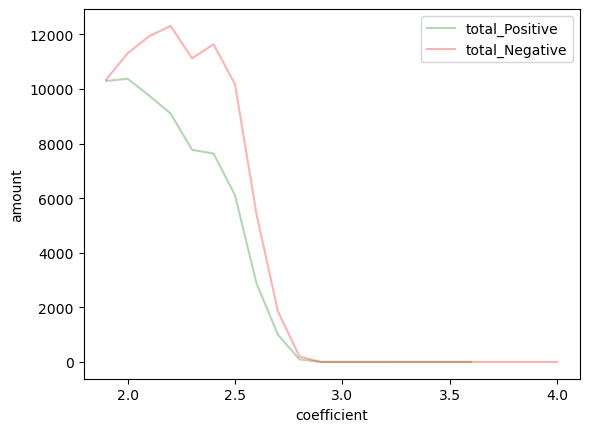

43.083418578437445


In [11]:
big_pos_counts, big_neg_counts = amount(big_pos, big_neg, 1.9, 0)


plt.plot(big_pos_counts.keys(), big_pos_counts.values(), color='green', label='total_Positive', alpha=0.3)
plt.plot(big_neg_counts.keys(), big_neg_counts.values(), color='red', label='total_Negative', alpha=0.3)
plt.legend(title='', loc='upper right')


# Add labels and legend
plt.xlabel('coefficient')
plt.ylabel('amount')

#plt.legend()

# Show the graph
plt.show()
probability = len(big_pos) /(len(big_pos) + len(big_neg))*100
print(probability)


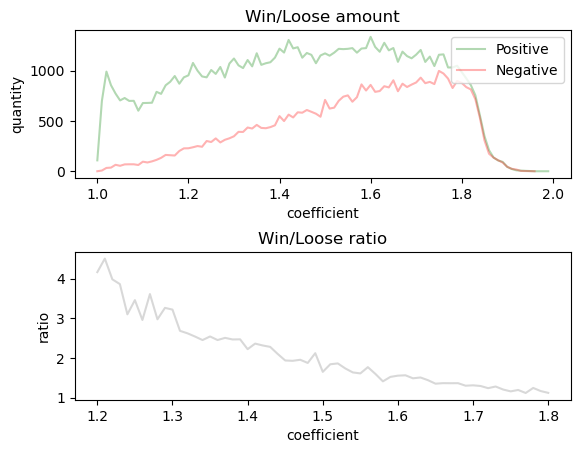

Winrate : 66.61372444714644


In [12]:
total_pos_counts, total_neg_counts = amount(tot_pos, tot_neg)
plot_amount_diff(total_pos_counts, total_neg_counts)
print("Winrate :", winrate(tot_pos, tot_neg))

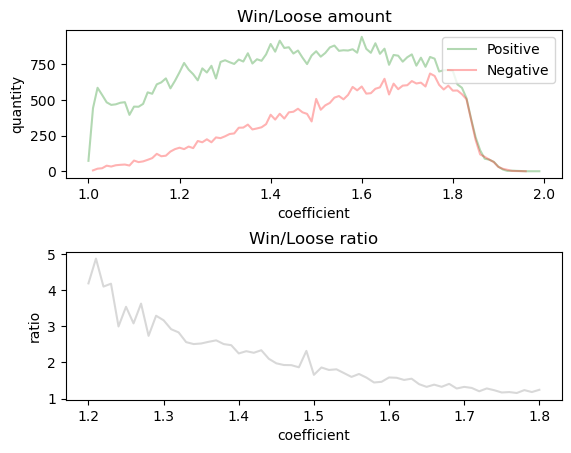

Winrate : 66.66848293974695


In [13]:
home_pos_counts, home_neg_counts = amount(home_pos, home_neg)
plot_amount_diff(home_pos_counts, home_neg_counts)
print("Winrate :", winrate(home_pos, home_neg))

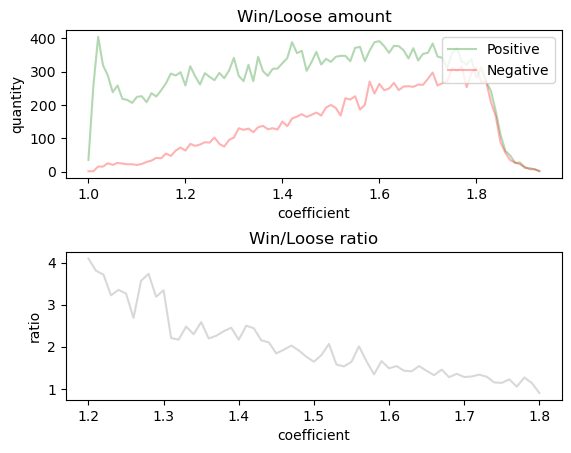

Winrate : 66.49991201387667


In [14]:
not_home_pos_counts, not_home_neg_counts = amount(not_home_pos, not_home_neg)
plot_amount_diff(not_home_pos_counts, not_home_neg_counts)
print("Winrate :", winrate(not_home_pos, not_home_neg))

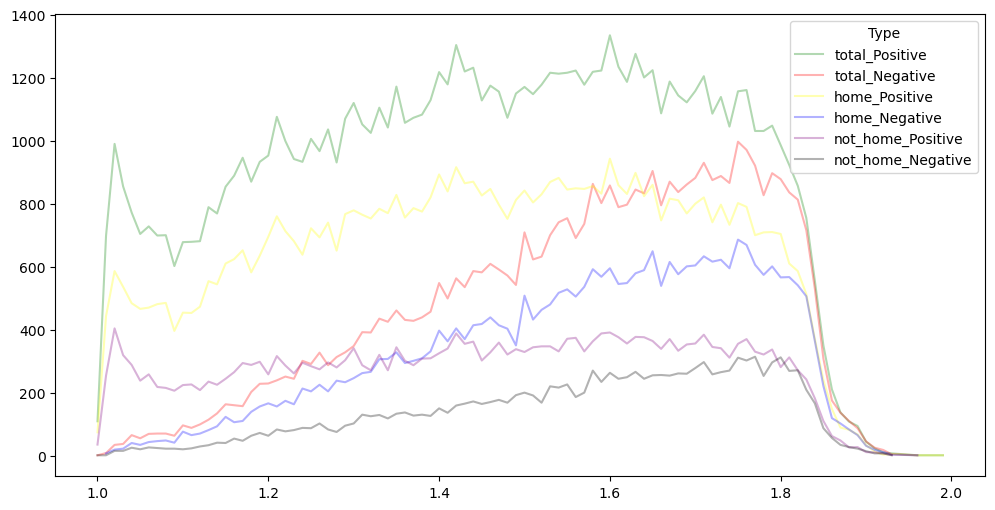

In [15]:
plt.figure(figsize=(12,6))
plt.plot(total_pos_counts.keys(), total_pos_counts.values(), color='green', label='total_Positive', alpha=0.3)
plt.plot(total_neg_counts.keys(), total_neg_counts.values(), color='red', label='total_Negative', alpha=0.3)
plt.plot(home_pos_counts.keys(), home_pos_counts.values(), color='yellow', label='home_Positive', alpha=0.3)
plt.plot(home_neg_counts.keys(), home_neg_counts.values(), color='blue', label='home_Negative', alpha=0.3)
plt.plot(not_home_pos_counts.keys(), not_home_pos_counts.values(), color='purple', label='not_home_Positive', alpha=0.3)
plt.plot(not_home_neg_counts.keys(), not_home_neg_counts.values(), color='black', label='not_home_Negative', alpha=0.3)
plt.legend(title='Type', loc='upper right')

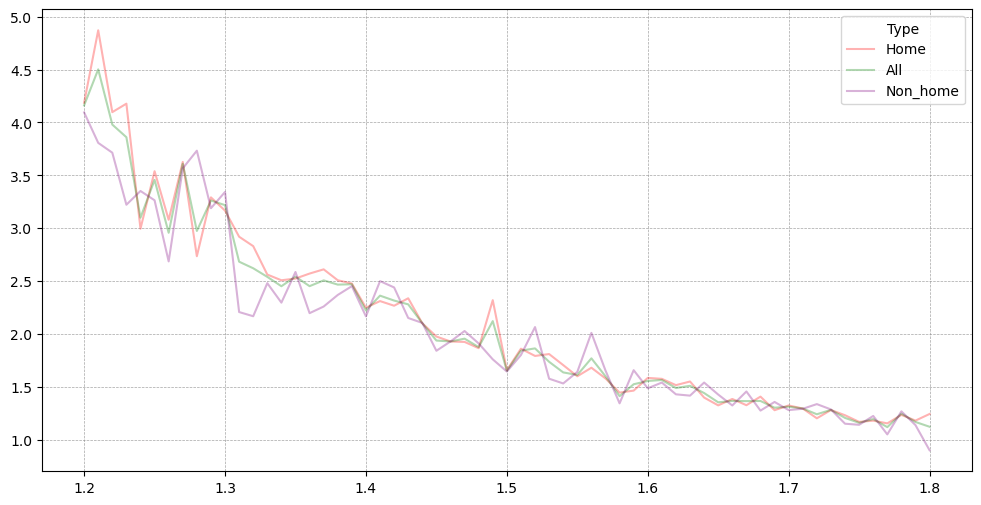

In [16]:
home_diff = diff(home_pos_counts, home_neg_counts)
all_diff = diff(total_pos_counts, total_neg_counts)
not_home_diff = diff(not_home_pos_counts, not_home_neg_counts)
plt.figure(figsize=(12,6))      
plt.plot(home_diff.keys(), home_diff.values(), color='red', label='Home', alpha=0.3)
plt.plot(all_diff.keys(), all_diff.values(), color='green', label='All', alpha=0.3)
plt.plot(not_home_diff.keys(), not_home_diff.values(), color='purple', label='Non_home', alpha=0.3)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.legend(title='Type')

In [17]:
big_pos_counts, big_neg_counts = stats(big_pos, big_neg)
big_home_pos_counts, big_home_neg_counts = stats(big_home_pos, big_home_neg)
plt.plot(big_pos_counts.keys(), big_pos_counts.values(), color='purple', label='big_Positive', alpha=0.3)
plt.plot(big_neg_counts.keys(), big_neg_counts.values(), color='black', label='big_Negative', alpha=0.3)
plt.plot(big_home_pos_counts.keys(), big_home_pos_counts.values(), color='blue', label='big_home_Positive', alpha=0.3)
plt.plot(big_home_neg_counts.keys(), big_home_neg_counts.values(), color='green', label='big_home_Negative', alpha=0.3)
plt.legend(title='Type', loc='upper right')

NameError: name 'stats' is not defined

In [ ]:
import random 

def favorit_bet(positives, negatives, multiplyer, bet_value=10, start_bank=1000, printable=False):
    total = 0
    count = 0
    prev = 0
    bets = 0
    bank = start_bank
    init_bet_value = int(bet_value * 1)
    max_bet = 0
    cur_negative_serie = 0
    longest_n_serie = 0
    massive = []
    for sub_array in positives:
        sub_array[0] = 1
        massive.append(sub_array)
    for sub_array in negatives:
        sub_array[0] = 0
        massive.append(sub_array)
    random.shuffle(massive)
    for match in massive:
        if match[1] < 1.2 or match[1] > 1.5:
            continue
        if not prev:
            bet_value = bet_value * 2
        if bank < init_bet_value:
            print("Bank is empty")
            print("Max bet: ", max_bet)
            return 0
        prev = 0
        if bet_value > max_bet:
            max_bet = bet_value
        if match[0]:
            total += match[1] * bet_value
            bank += match[1] * bet_value
            prev = 1
            bet_value = init_bet_value
        bets += bet_value
        bank -= bet_value
    if printable:
        print("Bets: ", bets)
        print("Win: ", total)
        print("Max bet: ", max_bet)
        print("Result: ", total - bets)
            

In [ ]:
rng = 2
tot_won = 0
for a in range(rng):
    favorit_bet(tot_pos, tot_neg, 2, 20, 1000, True)
    print("_______________")

In [ ]:
tot_won / 1000

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier

In [ ]:
def coef_data(coef):
    X = []
    y = []
    for a in data.iterrows():
        a = a[1]
        if (a[6] / a[7]) >= coef or (a[7] / a[6]) >= coef:
            X.append([a[6], a[7], a[8]])
            if a[2] > a[4]:
                y.append(0)
            elif a[2] == a[4]:
                y.append(1)
            else:
                y.append(2)
    return X, y
            
            
        

In [ ]:
def favorit():
    y = []
    for a in data.iterrows():
        a = a[1]
        if a[2] > a[4]:
            y.append(0)
        elif a[2] == a[4]:
            y.append(1)
        else:
            y.append(2)
    return y

In [ ]:
#columns = ["tournament", "team_1", "team_1_goals", "team_2", "team_2_goals", "time", "coef_w_1", "coef_w_2", "coef_even"]
#X = data.drop(columns=["tournament", 'team_1', 'team_2', 'time', "team_2_goals", "team_1_goals"])
#print(X)
X, y = coef_data(2.5)
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3)
model = SGDClassifier(loss='log', random_state=42)
model = model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))
print(model.score(X_test, y_test))

In [ ]:
def total_profit(prediction, test, data, bet_value=10):
    count = 0
    total = 0
    for a in data.iterrows():
        if prediction[a[0]] == test[a[0]] and prediction[a[0]] == 0:
            total += 1.8 * bet_value
        elif prediction[a[0]] == test[a[0]] and prediction[a[0]] == 1:
            total += 2.0 * bet_value
        count += 1
    print("Bet: ", count * bet_value)
    print("Won: ", total)
    print("Profeet: ", total - count * bet_value)

In [ ]:
total_profit(predictions, y_test, data_2, 10)

In [ ]:
y = total_gols(3.5, together)
total = 0
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3)
pipe = make_pipeline(StandardScaler(), SGDClassifier(loss='log', random_state=42))
pipe.fit(X_train, y_train)
prediction = pipe.predict(X_test)
pipe.score(X_test, y_test)

In [ ]:
trues = [y_test[i] for i in range(len(prediction)) if prediction[i] == y_test[i]]
trues

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [ ]:
def classifier_data(data):
    y = []
    for a in data.iterrows():
        a = a[1]
        if a[7] == 1:
            y.append(0)
        elif a[8] == 1:
            y.append(1)
        elif a[9] == 1:
            y.append(2)
    return y

In [ ]:
indecess = []
X = together
#for a in range(X.shape[0]):
 #   if X.iloc[a]['coef_w_1'] / X.iloc[a]['coef_w_2'] < 1.5 and X.iloc[a]['coef_w_2'] / X.iloc[a]['coef_w_1'] < 1.5:
  #      indecess.append(a)
X = X.drop(indecess)
y = classifier_data(X)
X = X.drop(columns=['team_1', 'team_2', 'time', 'score', '1', 'x', '2'])
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3)
clf = RandomForestClassifier(max_depth=8, random_state=42)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print(
  'mean_squared_error : ', mean_squared_error(y_test, prediction))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, prediction))
print(clf.score(X_test, y_test))

In [ ]:
prediction

In [ ]:
def ladder_prob(coef, multiplyer, bet_value=10, bets_lim=10000000, printable=False):
    res_positive = []
    res_negative = []
    res_even = []
    total = 0
    count = 0
    prev = 'none'
    bets = []
    init_bet = int(bet_value * 1)
    max_bet = 0
    cur_negative_serie = 0
    longest_n_serie = 0
    win_row = 0
    for a in data.sample(frac=1).iterrows():
    #for a in data.iterrows():
        a = a[1]
        if (a[6] / a[7]) >= coef and a[7] > 1.3 or (a[7] / a[6]) >= coef and a[6] > 1.3:
            pass
        else:
            continue
        if bet_value > max_bet:
            max_bet = bet_value
        count += 1
        if (len(res_positive) + len(res_negative) + len(res_even)) > bets_lim:
            break
            
        if (a[6] / a[7]) >= coef and a[4] > a[2]:
            res_positive.append(a[7])
            bets.append(bet_value)
            win_row += 1
            
            win = a[7] * bet_value
            total += win
            if win_row == 2:
                win_row = 0
                bet_value  = bet_value * 2
            prev = 'positive'
        elif (a[7] / a[6]) >= coef and a[2] > a[4]:
            res_positive.append(a[6])
            bets.append(bet_value)
            win_row += 1
            
            win = a[6] * bet_value
            total += win
            if win_row == 2:
                win_row = 0
                bet_value  = bet_value * 2
            prev = 'positive'
        elif (a[7] / a[6]) >= coef and a[4] > a[2]:
            bets.append(bet_value)
            win_row = 0
            res_negative.append(a[7])
            
            bet_value = init_bet
            prev = 'negative'
        elif (a[6] / a[7]) >= coef and a[2] > a[4]:
            bets.append(bet_value)
            win_row = 0
            res_negative.append(a[6]) 
            
        
            bet_value = init_bet
            prev = 'negative'
        elif (a[6] / a[7]) >= coef and a[2] == a[4]:
            bets.append(bet_value)
            win_row = 0
            res_even.append(a[6])
            
            bet_value = init_bet
            prev = 'negative'
        elif (a[7] / a[6]) >= coef and a[2] == a[4]:
            bets.append(bet_value)
            win_row = 0
            res_even.append(a[6]) 
            
            bet_value = init_bet
            prev = 'negative'
    if printable:      
        print("Positives:", len(res_positive))
        if len(res_positive) != 0:
            print("Average positive coef: ", sum(res_positive) / len(res_positive))
        print("Negatives:", len(res_negative))
        if len(res_negative) != 0:
            print("Average negative coef: ", sum(res_negative) / len(res_negative))
        print("Even:", len(res_even))
        if len(res_even) != 0:
            print("Average even coef: ", sum(res_even) / len(res_even))
        print("Total: ", total)
        print("Max_Bet_value:", max_bet)
        print("Bet: ", sum(bets))
        print("Longest n serie:", longest_n_serie)
        print("Won :", total - math.fsum(bets))
        print("___________________________________")
    return (total - math.fsum(bets))

In [ ]:
rng = 1
tot_won = 0
for a in range(rng):
    tot_won += ladder_prob(2, 2, 100, 100000000, True)
print(tot_won)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
x = {}
y = {}
e = {}
z = {}
positives = 0
negatives = 0
even = 0
for a in data.iterrows():
    a = a[1]
    if (a[6] / a[7]) > 20 or (a[7] / a[6]) > 20:
        continue

    if (a[6] / a[7]) >= 2.5 and a[4] > a[2]:
        try:
            x[round((a[6] / a[7]), 1)] += 1
        except:
            x[round((a[6] / a[7]), 1)] = 1
        positives += 1
    elif (a[7] / a[6]) >= 2.5 and a[2] > a[4]:
        try:
            x[round((a[7] / a[6]), 1)] += 1
        except:
            x[round((a[7] / a[6]), 1)] = 1
        positives += 1
    else:    
        if (a[6] / a[7]) >= 2.5:
            if a[2] == a[4]:
                try:
                    y[round((a[6] / a[7]), 1)] += 1
                except:
                    y[round((a[6] / a[7]), 1)] = 1
                even += 1
            else:
                try:
                    y[round((a[6] / a[7]), 1)] += 1
                except:
                    y[round((a[6] / a[7]), 1)] = 1
                negatives += 1
        elif (a[7] / a[6]) >= 2.5:
            if a[2] == a[4]:
                try:
                    y[round((a[7] / a[6]), 1)] += 1
                except:
                    y[round((a[7] / a[6]), 1)] = 1
                even += 1
            else:
                try:
                    y[round((a[7] / a[6]), 1)] += 1
                except:
                    y[round((a[7] / a[6]), 1)] = 1
                negatives += 1
for key in x:
    if key in y:
        z[key] = round(x[key] / y[key], 1)
print(positives)
print(negatives)
print(even)

In [ ]:



plt.bar(x.keys(), x.values(), color='g')
#plt.bar(e.keys(), e.values(), color='y')
plt.bar(y.keys(), y.values(), color='r')

#plt.bar(z.keys(), z.values(), color='r')




plt.xlabel('coefs')
plt.ylabel('proportion')

In [ ]:
x = {}
y = {}
e = {}
z = {}
positives = 0
negatives = 0
even = 0
for a in data.iterrows():
    a = a[1]
    if (a[6] / a[7]) > 20 or (a[7] / a[6]) > 20:
        continue

    if (a[6] / a[7]) >= 2.5 and a[4] > a[2]:
        try:
            x[round(a[7], 1)] += 1
        except:
            x[round(a[7], 1)] = 1
        positives += 1
    elif (a[7] / a[6]) >= 2.5 and a[2] > a[4]:
        try:
            x[round(a[6], 1)] += 1
        except:
            x[round(a[6], 1)] = 1
        positives += 1
    else:    
        if (a[6] / a[7]) >= 2.5:
            if a[2] == a[4]:
                try:
                    y[round((a[6] / a[7]), 1)] += 1
                except:
                    y[round((a[6] / a[7]), 1)] = 1
                even += 1
            else:
                try:
                    y[round((a[6] / a[7]), 1)] += 1
                except:
                    y[round((a[6] / a[7]), 1)] = 1
                negatives += 1
        elif (a[7] / a[6]) >= 2.5:
            if a[2] == a[4]:
                try:
                    y[round((a[7] / a[6]), 1)] += 1
                except:
                    y[round((a[7] / a[6]), 1)] = 1
                even += 1
            else:
                try:
                    y[round((a[7] / a[6]), 1)] += 1
                except:
                    y[round((a[7] / a[6]), 1)] = 1
                negatives += 1
for key in x:
    if key in y:
        z[key] = round(x[key] / y[key], 1)
print(positives)
print(negatives)
print(even)

In [ ]:
stat_array = []
neg_array = []
for keys in x:
    for value in range(x[keys]):
        stat_array.append(keys)
for keys in y:
    for value in range(y[keys]):
        neg_array.append(keys)
print(len(stat_array))
print(len(neg_array))
print("Positive proc: ", (100 * len(stat_array)) / (len(stat_array) + len(neg_array)))

In [ ]:
import statistics

print((statistics.median(stat_array) * len(stat_array) * 50) - ((len(neg_array) * 50) + (len(stat_array) * 50)))


In [ ]:
statistics.mean(stat_array)